## Made by: CHARVI SINGH

## Project Description:
🚀 A/B Testing Analysis – This project analyzes user behavior on two webpage versions (Original vs. Optimized) to determine which performs better based on conversion rate and time spent. We use visualizations and statistical tests (Chi-Square & T-Test) for insights.



In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [7]:
df = pd.read_csv('AB Testing Dataset.csv')
df


,user_id,group,visit_date,page_version,time_on_page,clicked_CTA,converted,device_type,traffic_source
0,1,A,2024-01-17,Original,35,0,0,Tablet,Paid
1,2,B,2024-01-17,Optimized,24,1,0,Desktop,Social Media
2,3,B,2024-01-22,Optimized,11,1,0,Desktop,Organic
3,4,B,2024-01-20,Optimized,67,1,0,Desktop,Organic
4,5,A,2024-01-22,Original,38,1,0,Mobile,Paid
...,...,...,...,...,...,...,...,...,...
84995,84996,A,2024-01-01,Original,50,0,0,Mobile,Paid
84996,84997,B,2024-01-13,Optimized,57,1,0,Desktop,Social Media
84997,84998,B,2024-01-02,Optimized,71,1,0,Desktop,Organic
84998,84999,A,2024-01-15,Original,61,1,0,Desktop,Paid


In [9]:
df.head()

,user_id,group,visit_date,page_version,time_on_page,clicked_CTA,converted,device_type,traffic_source
0,1,A,2024-01-17,Original,35,0,0,Tablet,Paid
1,2,B,2024-01-17,Optimized,24,1,0,Desktop,Social Media
2,3,B,2024-01-22,Optimized,11,1,0,Desktop,Organic
3,4,B,2024-01-20,Optimized,67,1,0,Desktop,Organic
4,5,A,2024-01-22,Original,38,1,0,Mobile,Paid


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85000 entries, 0 to 84999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         85000 non-null  int64 
 1   group           85000 non-null  object
 2   visit_date      85000 non-null  object
 3   page_version    85000 non-null  object
 4   time_on_page    85000 non-null  int64 
 5   clicked_CTA     85000 non-null  int64 
 6   converted       85000 non-null  int64 
 7   device_type     85000 non-null  object
 8   traffic_source  85000 non-null  object
dtypes: int64(4), object(5)
memory usage: 5.8+ MB


In [13]:
print(df.isnull().sum())

user_id           0
group             0
visit_date        0
page_version      0
time_on_page      0
clicked_CTA       0
converted         0
device_type       0
traffic_source    0
dtype: int64


### Therefore, we dont have any null row in any of our columns good to go ahead

### basic stats (mean, median, min, max) of numeric columns.

In [17]:
df.describe()

,user_id,time_on_page,clicked_CTA,converted
count,85000.000000,85000.000000,85000.000000,85000.000000
mean,42500.500000,52.542365,0.400918,0.065941
std,24537.530778,14.801910,0.490087,0.248181
min,1.000000,10.000000,0.000000,0.000000
25%,21250.750000,42.000000,0.000000,0.000000
50%,42500.500000,51.000000,0.000000,0.000000
75%,63750.250000,62.000000,1.000000,0.000000
max,85000.000000,118.000000,1.000000,1.000000


### Convert the visit_date column to datetime format.

In [19]:
df['visit_date'] = pd.to_datetime(df['visit_date'])

C:\Users\charv\AppData\Local\Temp\ipykernel_23580\2212727045.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='group', data=df, palette='pastel')


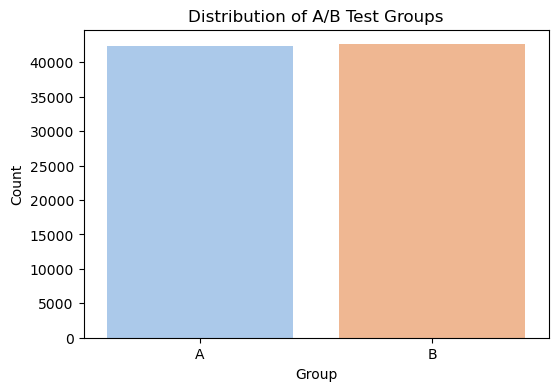

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='group', data=df, palette='pastel')
plt.title('Distribution of A/B Test Groups')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()


In [27]:
conversion_rates = df.groupby('group')['converted'].mean()
print(conversion_rates)


group
A    0.030495
B    0.101223
Name: converted, dtype: float64


C:\Users\charv\AppData\Local\Temp\ipykernel_23580\1987517360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette='coolwarm')


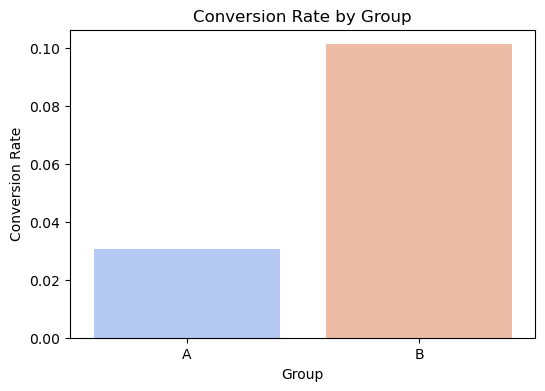

In [29]:
plt.figure(figsize=(6,4))
sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette='coolwarm')
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.show()

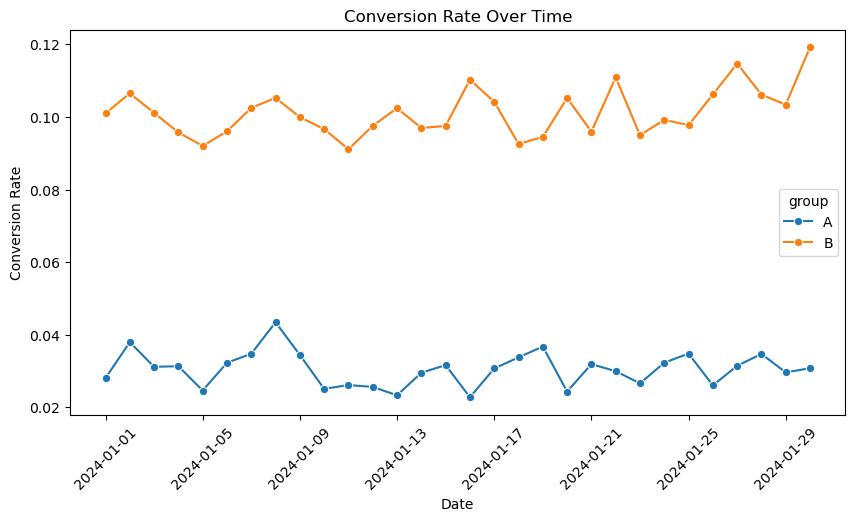

In [46]:
plt.figure(figsize=(10,5))
df_grouped = df.groupby(['visit_date', 'group'])['converted'].mean().reset_index()
sns.lineplot(data=df_grouped, x='visit_date', y='converted', hue='group', marker='o')
plt.title('Conversion Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()

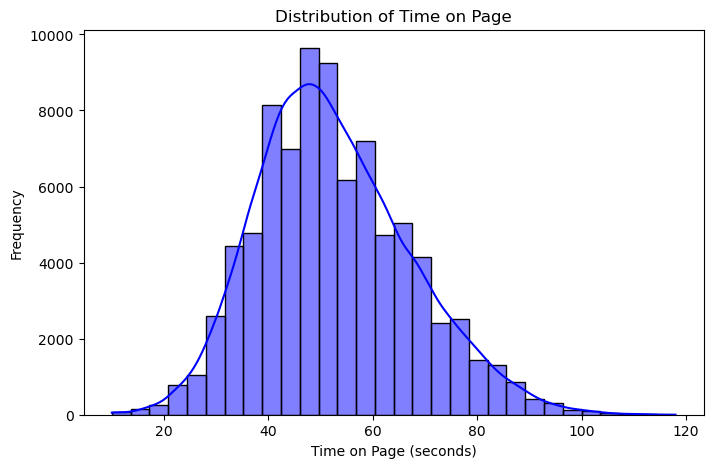

In [48]:
plt.figure(figsize=(8,5))
sns.histplot(df['time_on_page'], bins=30, kde=True, color='blue')
plt.title('Distribution of Time on Page')
plt.xlabel('Time on Page (seconds)')
plt.ylabel('Frequency')
plt.show()

C:\Users\charv\AppData\Local\Temp\ipykernel_23580\884105763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['device_type'], y=df['converted'], palette='Set2')


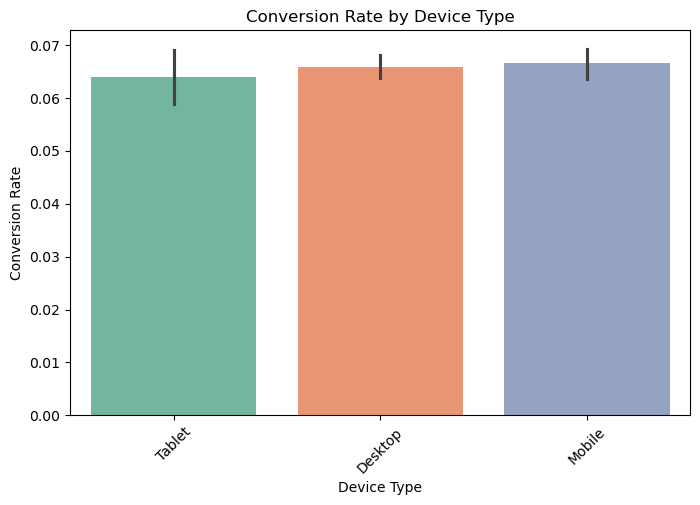

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['device_type'], y=df['converted'], palette='Set2')
plt.title('Conversion Rate by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()

C:\Users\charv\AppData\Local\Temp\ipykernel_23580\3658409.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['traffic_source'], y=df['converted'], palette='viridis')


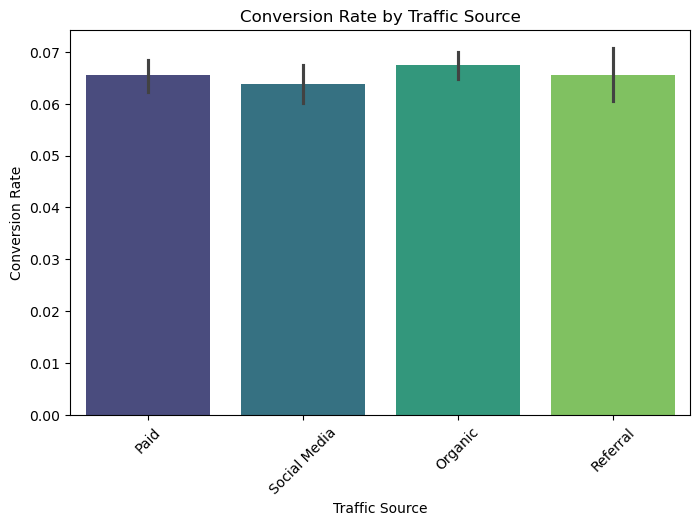

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['traffic_source'], y=df['converted'], palette='viridis')
plt.title('Conversion Rate by Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()

In [37]:
contingency_table = pd.crosstab(df['group'], df['converted'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-Square Test Results: Chi2={chi2:.4f}, p-value={p:.4f}')

Chi-Square Test Results: Chi2=1724.7461, p-value=0.0000


In [51]:
time_a = df[df['group'] == 'A']['time_on_page']
time_b = df[df['group'] == 'B']['time_on_page']
t_stat, p_value = stats.ttest_ind(time_a, time_b, equal_var=False)
print(f'T-Test Results: t-statistic={t_stat:.4f}, p-value={p_value:.4f}')


T-Test Results: t-statistic=-171.8230, p-value=0.0000


C:\Users\charv\AppData\Local\Temp\ipykernel_23580\1134650583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['converted'], y=df['time_on_page'], palette='coolwarm')


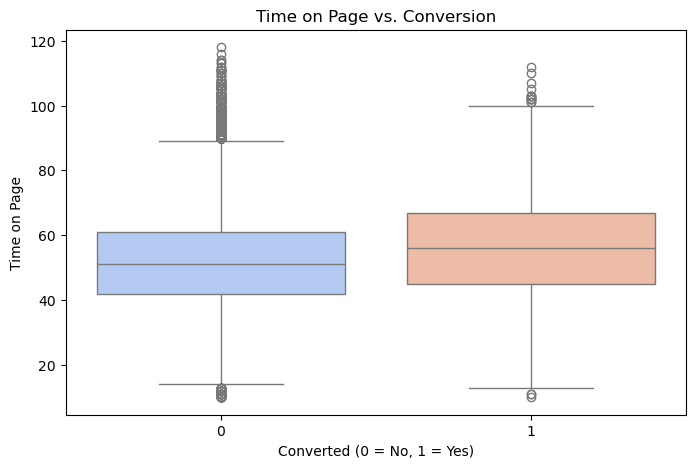

In [53]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['converted'], y=df['time_on_page'], palette='coolwarm')
plt.title('Time on Page vs. Conversion')
plt.xlabel('Converted (0 = No, 1 = Yes)')
plt.ylabel('Time on Page')
plt.show()


### Final conclusion:

In [41]:
if p < 0.05:
    print("Statistically significant difference in conversion rates between Group A and Group B.")
else:
    print("No significant difference in conversion rates.")

Statistically significant difference in conversion rates between Group A and Group B.


In [55]:
print("\n### Summary Report ###")
print(f"Total users: {df.shape[0]}")
print(f"Conversion Rate A: {conversion_rates['A']:.2%}")
print(f"Conversion Rate B: {conversion_rates['B']:.2%}")
print("Key Insights:")
print("- Conversion rates differ between the groups.")
print("- Device type and traffic source impact conversion rates.")
print("- Users in Group B tend to spend different amounts of time on the page.")
print("- Conversion rate varies over time, which may indicate seasonal trends.")
print("- Time on page has an impact on conversion, with higher times correlating with higher conversions.")


### Summary Report ###
Total users: 85000
Conversion Rate A: 3.05%
Conversion Rate B: 10.12%
Key Insights:
- Conversion rates differ between the groups.
- Device type and traffic source impact conversion rates.
- Users in Group B tend to spend different amounts of time on the page.
- Conversion rate varies over time, which may indicate seasonal trends.
- Time on page has an impact on conversion, with higher times correlating with higher conversions.
